In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from numba import jit
import datetime

In [3]:
from mpl_toolkits.mplot3d import Axes3D

In [4]:
from sklearn import decomposition

In [5]:
columns = ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th']

In [6]:
df = pd.read_csv('coffee_data.csv', names = columns)
df.head()

,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th
0,0.889423,0.656893,0.673942,0.986993,260.063860,176.382532,385.884881,0.007265,0.769276,2.187773
1,0.811448,0.777945,0.757701,0.973928,357.955949,276.096302,472.423793,0.004694,0.836445,1.711083
2,0.752626,0.780545,0.810668,0.987678,218.547558,177.510928,269.589608,0.007187,0.909270,1.518721
3,0.797432,0.752530,0.776303,0.990189,207.793406,161.514715,267.670600,0.007893,0.887075,1.657252
4,0.755262,0.769477,0.808680,0.987194,193.127624,156.527203,238.818426,0.008152,0.886123,1.525731


# check null value

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1st     7000 non-null   float64
 1   2nd     7000 non-null   float64
 2   3rd     7000 non-null   float64
 3   4th     7000 non-null   float64
 4   5th     7000 non-null   float64
 5   6th     7000 non-null   float64
 6   7th     7000 non-null   float64
 7   8th     7000 non-null   float64
 8   9th     7000 non-null   float64
 9   10th    7000 non-null   float64
dtypes: float64(10)
memory usage: 547.0 KB


# min max scaling

In [8]:
data_minmax = np.array(df)

In [9]:
data_minmax = (data_minmax - data_minmax.min(axis=0)) / (data_minmax.max(axis=0) - data_minmax.min(axis=0))



In [10]:
data_minmax

array([[0.94077304, 0.32674461, 0.12124577, ..., 0.63021903, 0.58630258,
        0.8047575 ],
       [0.73085807, 0.71613036, 0.42562247, ..., 0.2691976 , 0.72712436,
        0.42101713],
       [0.57250404, 0.72449334, 0.61810024, ..., 0.6192665 , 0.87980169,
        0.26616336],
       ...,
       [0.58952817, 0.6272388 , 0.59401499, ..., 0.68184574, 0.83934247,
        0.27986798],
       [0.86931274, 0.83059842, 0.24749809, ..., 0.51134164, 0.71260046,
        0.63635705],
       [0.30366071, 0.62204382, 0.82941107, ..., 0.51667133, 0.8827238 ,
        0.10620742]])

# 차원축소 n = 3 case

In [11]:
model = decomposition.PCA(n_components=3) 

In [12]:
model.fit(data_minmax)
pca_data = model.transform(data_minmax)

In [13]:
pca_data

array([[ 4.05726146e-01, -5.42997895e-01,  8.65710697e-02],
       [ 4.06783850e-01,  3.03280584e-01, -3.57364907e-02],
       [-3.29615790e-01,  8.54053367e-02, -7.30683870e-02],
       ...,
       [-3.41242558e-01, -2.13697494e-02,  3.83690929e-04],
       [ 2.88174444e-01, -1.33805013e-01, -3.12218049e-01],
       [-4.95170605e-01,  3.54297291e-01,  1.43315710e-01]])

In [14]:
x = pca_data[:,:1]
y = pca_data[:,1:2]
z = pca_data[:,2:]

## plot data

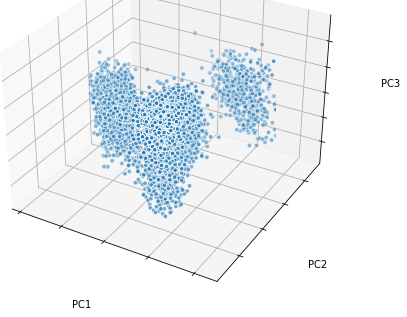

In [15]:

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x, y, z, edgecolor='w')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.dist = 6 

plt.show()

## k means clustering

In [16]:
@jit(nopython=True)
def euclidean_distance(feature, center):
    distance_list = []
    feature_numbers = len(feature[0])
    for i in range(len(feature)):
        dist = 0
        for j in range(feature_numbers):
            dist += (feature[i][j] - center[j]) ** 2
        distance_list.append(np.sqrt(dist))
    distance_list = np.array(distance_list)
    return distance_list

In [17]:
def get_centroid(feature, label_feature, value_label):
    feature_numbers = len(feature[0])
    num_check = 0
    index_storage = []
    centroids = np.array([0,0,0])
    #저장된 feature의 label이 value_label과 같은 경우 숫자를 체크해주어서 
    #해당 centorid와 label이 같은 data의 갯수를 카운트한다.
    for i in range(number_data):
        if label_feature[i] == value_label:
            num_check += 1
            index_storage.append(i)
            
    cluster_feature = np.zeros(shape=(num_check, number_feature))
    for i in range(num_check):
        for j in range(feature_numbers):
            cluster_feature[i][j] = feature[index_storage[i]][j]
        
    if num_check == 0:
        for i in range(feature_numbers):
            centroids[i] = 999999
        loss = 0
    else:
        centroids = np.mean(cluster_feature, axis = 0)
        loss = sum(euclidean_distance(cluster_feature, centroid[value_label]))
        
    return centroids, loss

In [18]:
def get_label(distance):
    labels = np.zeros(number_data)

    for i in range(number_data):
        cluster = np.argmin(distance[i])
        labels[i] = cluster
    
    return labels

# 4개의 군집으로 분류하는 경우

In [19]:
number_cluster      = 4
number_iteration    = 10
label_feature = np.zeros(len(df))        
#randint 값 고정
np.random.seed(0)
for i in range(len(label_feature)):
    label_feature[i] = np.random.randint(0,number_cluster) 

In [20]:
label_feature

array([0., 3., 1., ..., 2., 0., 1.])

In [21]:
#refit centroid
number_feature = 3
number_data = 7000
distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))
loss_iteration      = np.zeros(number_iteration)

start = datetime.datetime.now()
for i in range(number_iteration):
    distance = distance.T
    temp = 0
    for k in range(number_cluster):
        a, loss = get_centroid(pca_data, label_feature, k)
        temp += loss
        if a[0] > 99999:
            continue
        centroid[k] = a
        
    loss_iteration[i]   = temp * (1/number_data)    
        
    for j in range(number_cluster):
        distance[j] = euclidean_distance(pca_data, centroid[j])
        
    distance = distance.T
    label_feature = get_label(distance)
    centroid_iteration[i] = centroid
end = datetime.datetime.now()
print("모델 실행시간:", end-start)

모델 실행시간: 0:00:00.799000


In [22]:
def plt_loss_curve(loss_iteration):
    plt.figure(figsize=(8,6))   
    plt.title('loss')
    plt.plot(loss_iteration, '-', color='red')
    plt.tight_layout()
    plt.show()

In [23]:
def plt_centroid(centroid_iteration, number_cluster):
    colors = ['purple', 'green', 'blue', 'yellow', 'orange', 'black', 'pink', 'brown', 'olive', 'cyan']
    labels = ['cluster = 0', 'cluster = 1', 'cluster = 2', 'cluster = 3', 'cluster = 4', 'cluster = 5', 'cluster = 6', 'cluster = 7','cluster = 8','cluster = 9']


    plt.figure(figsize=(8,8))   
    plt.title('centroid')
    for i in range(number_cluster):
        plt.plot(centroid_iteration[:, i][:,0], centroid_iteration[:, i][:,1], '-', color=colors[i], label= labels[i])
    plt.plot(centroid_iteration[0][:,0], centroid_iteration[0][:,1],'o', color='blue', label= 'initial')
    plt.plot(centroid_iteration[-1][:,0], centroid_iteration[-1][:,1],'s', color='red', label= 'final')
    

    
    plt.legend(loc="upper right")
    plt.tight_layout()
    plt.show()

In [24]:
def ax_centroid(centroid_iteration, number_cluster):

    colors = ['purple', 'green', 'blue', 'yellow', 'orange', 'black', 'pink', 'brown', 'olive', 'cyan']
    labels = ['cluster = 0', 'cluster = 1', 'cluster = 2', 'cluster = 3', 'cluster = 4', 'cluster = 5', 'cluster = 6', 'cluster = 7','cluster = 8','cluster = 9']
    
    fig = plt.figure(figsize=(15, 6))
    ax = fig.add_subplot(111,projection='3d')
    for i in range(number_cluster):
        ax.plot(centroid_iteration[:, i][:,0], centroid_iteration[:, i][:,1], centroid_iteration[:, i][:,2],color=colors[i], label = labels[i])
    ax.plot(centroid_iteration[0][:,0], centroid_iteration[0][:,1],centroid_iteration[0][:,2],'o', color='blue', label= 'initial')
    ax.plot(centroid_iteration[-1][:,0], centroid_iteration[-1][:,1],centroid_iteration[-1][:,2],'s', color='red', label= 'final')
    
    

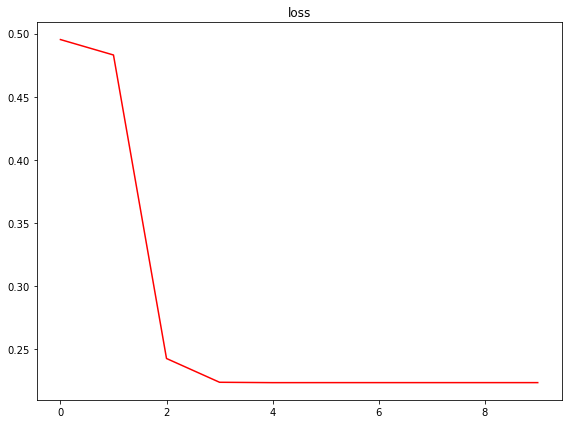

In [25]:
plt_loss_curve(loss_iteration)

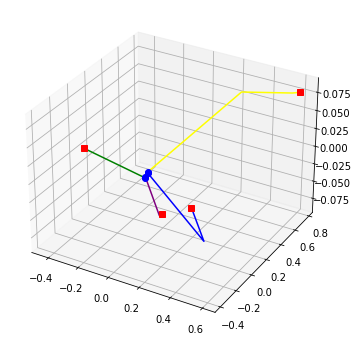

In [26]:
ax_centroid(centroid_iteration, number_cluster)

C:\Users\LEE\AppData\Local\Temp/ipykernel_28076/3307765893.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=48, azim=134) # Set the elevation and azimuth of the axes. (축의 고도와 방위각)


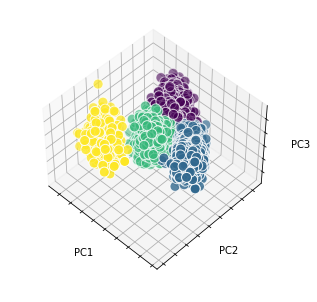

In [27]:
fig = plt.figure()
ax = Axes3D(fig, elev=48, azim=134) # Set the elevation and azimuth of the axes. (축의 고도와 방위각)

ax.scatter(x, y, z, c=label_feature, edgecolor='w', s=100)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.dist = 12 # 값이 커지면 전체 plot 이 작아짐

plt.show()

# 분할표 저장

In [28]:
# initiallize contingency table
contingency = np.zeros(shape=(len(df), len(df)))
contingency

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
@jit(nopython=True)
def get_contingency_table(contingency, label_feature):
    for i in range(len(contingency[0])):
        now = label_feature[i]
        for j in range(len(contingency)):
            if now == label_feature[j]:
                contingency[:,i][j] = 1
    return contingency
    

In [30]:
contingency = get_contingency_table(contingency, label_feature)

In [31]:
contingency = pd.DataFrame(contingency)
contingency.head()

,0,1,2,3,4,5,6,7,8,9,...,6990,6991,6992,6993,6994,6995,6996,6997,6998,6999
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
3,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
4,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [32]:
contingency.to_csv("20171006-1.csv")

# 8개의 군집으로 분류하는 경우

In [33]:
number_cluster      = 8
number_iteration    = 10
label_feature = np.zeros(len(df))         #cluster label intialize
np.random.seed(0)
for i in range(len(label_feature)):
    label_feature[i] = np.random.randint(0,number_cluster) # cluster 0 ~ 4

In [34]:
label_feature

array([4., 7., 5., ..., 2., 4., 5.])

In [35]:
#refit centroid
number_feature = 3
number_data = 7000
distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))
loss_iteration      = np.zeros(number_iteration)

start = datetime.datetime.now()
for i in range(number_iteration):
    distance = distance.T
    temp = 0
    for k in range(number_cluster):
        a, loss = get_centroid(pca_data, label_feature, k)
        temp += loss
        if a[0] > 99999:
            continue
        centroid[k] = a
        
    loss_iteration[i]   = temp * (1/number_data)    
        
    for j in range(number_cluster):
        distance[j] = euclidean_distance(pca_data, centroid[j])
        
    distance = distance.T
    label_feature = get_label(distance)
    centroid_iteration[i] = centroid
end = datetime.datetime.now()
print("모델 실행시간:", end-start)

모델 실행시간: 0:00:00.419000


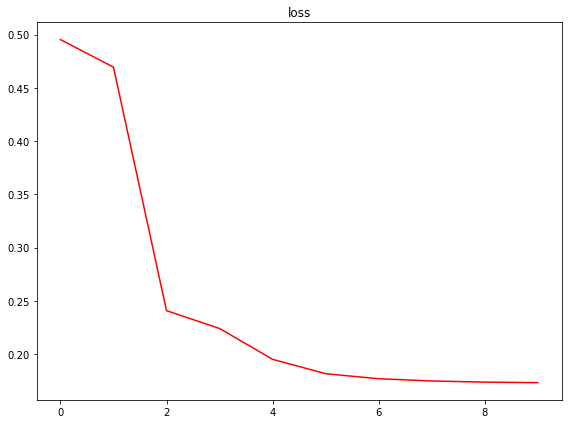

In [36]:
plt_loss_curve(loss_iteration)

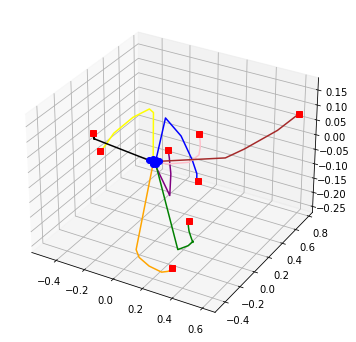

In [37]:
ax_centroid(centroid_iteration, number_cluster)

C:\Users\LEE\AppData\Local\Temp/ipykernel_28076/3307765893.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=48, azim=134) # Set the elevation and azimuth of the axes. (축의 고도와 방위각)


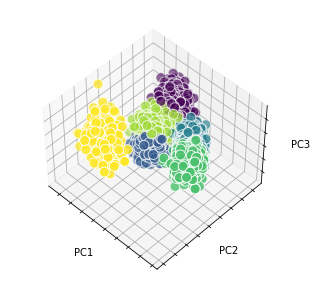

In [38]:
fig = plt.figure()
ax = Axes3D(fig, elev=48, azim=134) # Set the elevation and azimuth of the axes. (축의 고도와 방위각)

ax.scatter(x, y, z, c=label_feature, edgecolor='w', s=100)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.dist = 12 # 값이 커지면 전체 plot 이 작아짐

plt.show()

# 분할표 저장

In [39]:
# initiallize contingency table
contingency = np.zeros(shape=(len(df), len(df)))
contingency

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
contingency = get_contingency_table(contingency, label_feature)
contingency = pd.DataFrame(contingency)
contingency.head()

,0,1,2,3,4,5,6,7,8,9,...,6990,6991,6992,6993,6994,6995,6996,6997,6998,6999
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [41]:
contingency.to_csv("20171006-2.csv")

# 차원축소 n = 2 case

In [42]:
model = decomposition.PCA(n_components=2)
model.fit(data_minmax)
pca_data = model.transform(data_minmax)

In [43]:
x = pca_data[:,:1]
y = pca_data[:,1:]

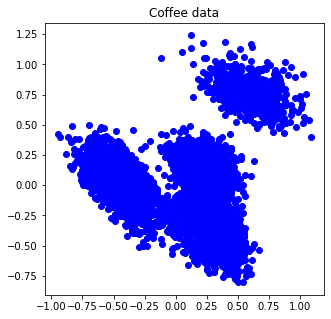

In [44]:
plt.figure(figsize=(5,5))   
plt.title('Coffee data')

plt.plot(x, y,'o', color='blue')

# 4개의 군집으로 분류하는 경우

In [45]:
number_cluster      = 4
number_iteration    = 10
label_feature = np.zeros(len(df))         #cluster label intialize
np.random.seed(0)
for i in range(len(label_feature)):
    label_feature[i] = np.random.randint(0,number_cluster) # cluster 0 ~ 4

In [46]:
#refit centroid
number_feature = 2
number_data = 7000
distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))
loss_iteration      = np.zeros(number_iteration)

start = datetime.datetime.now()
for i in range(number_iteration):
    distance = distance.T
    temp = 0
    for k in range(number_cluster):
        a, loss = get_centroid(pca_data, label_feature, k)
        temp += loss
        if a[0] > 99999:
            continue
        centroid[k] = a
        
    loss_iteration[i]   = temp * (1/number_data)    
        
    for j in range(number_cluster):
        distance[j] = euclidean_distance(pca_data, centroid[j])
        
    distance = distance.T
    label_feature = get_label(distance)
    centroid_iteration[i] = centroid

end = datetime.datetime.now()
print("모델 실행시간:", end-start)

모델 실행시간: 0:00:00.310999


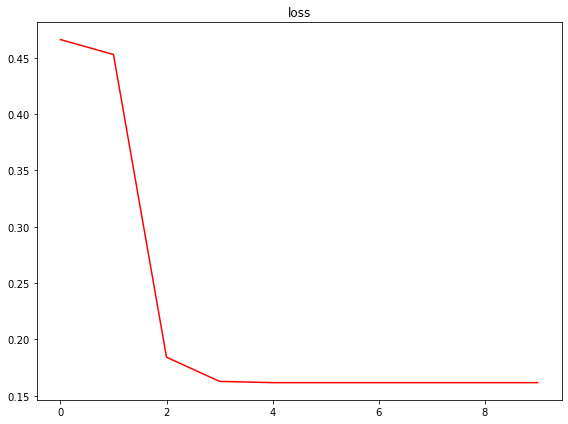

In [47]:
plt_loss_curve(loss_iteration)

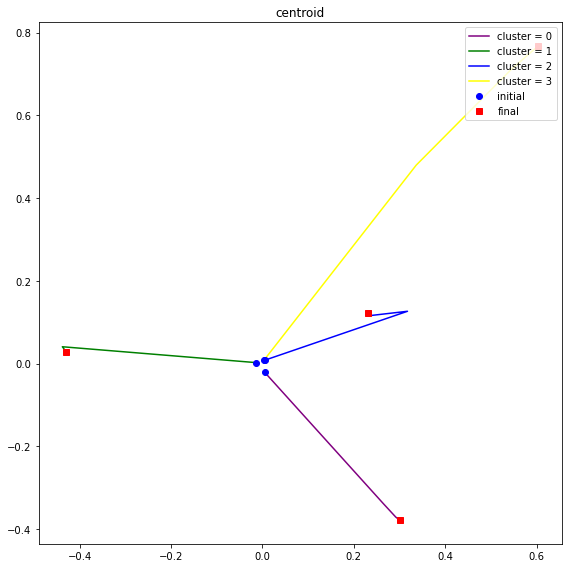

In [48]:
plt_centroid(centroid_iteration, number_cluster)

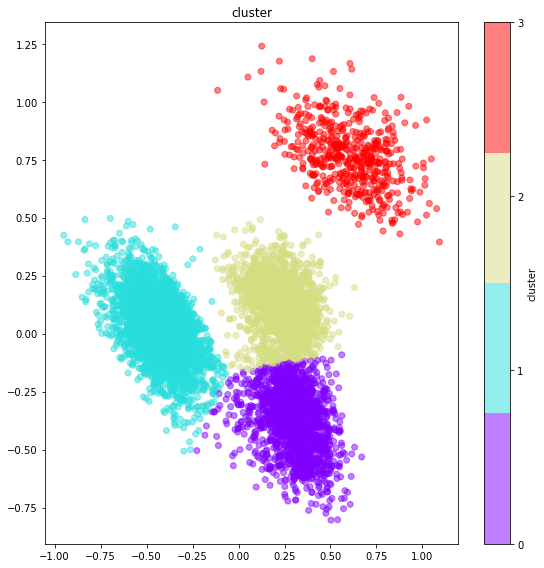

In [49]:
color_num = number_cluster
plt.figure(figsize=(8,8))  
plt.title('cluster')
plt.scatter(x, y, c = label_feature, cmap = plt.cm.get_cmap('rainbow', color_num), alpha = 0.5)
plt.colorbar(ticks = range(color_num), format = '%d', label = 'cluster')

plt.tight_layout()
plt.show()

In [50]:
# initiallize contingency table
contingency = np.zeros(shape=(len(df), len(df)))
contingency


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
contingency = get_contingency_table(contingency, label_feature)
contingency = pd.DataFrame(contingency)
contingency.head()

,0,1,2,3,4,5,6,7,8,9,...,6990,6991,6992,6993,6994,6995,6996,6997,6998,6999
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
3,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
4,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [52]:
contingency.to_csv("20171006-3.csv")

# 8개의 군집으로 분류하는 경우

In [53]:
number_cluster      = 8
number_iteration    = 10
label_feature = np.zeros(len(df))         #cluster label intialize
np.random.seed(0)
for i in range(len(label_feature)):
    label_feature[i] = np.random.randint(0,number_cluster) # cluster 0 ~ 4

In [54]:
#refit centroid
number_feature = 2
number_data = 7000
distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))
loss_iteration      = np.zeros(number_iteration)

start = datetime.datetime.now()
for i in range(number_iteration):
    distance = distance.T
    temp = 0
    for k in range(number_cluster):
        a, loss = get_centroid(pca_data, label_feature, k)
        temp += loss
        if a[0] > 99999:
            continue
        centroid[k] = a
        
    loss_iteration[i]   = temp * (1/number_data)    
        
    for j in range(number_cluster):
        distance[j] = euclidean_distance(pca_data, centroid[j])
        
    distance = distance.T
    label_feature = get_label(distance)
    centroid_iteration[i] = centroid

end = datetime.datetime.now()
print("모델 실행시간:", end-start)

모델 실행시간: 0:00:00.385997


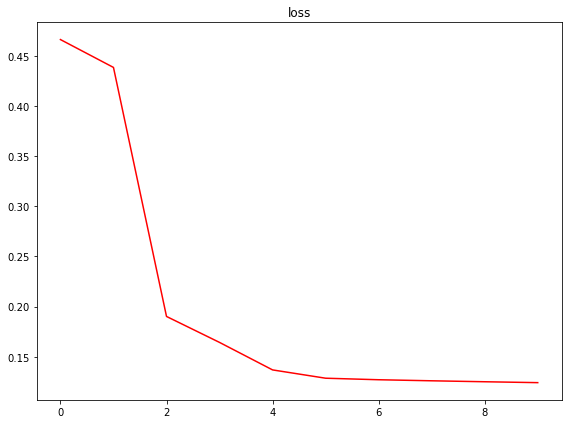

In [55]:
plt_loss_curve(loss_iteration)

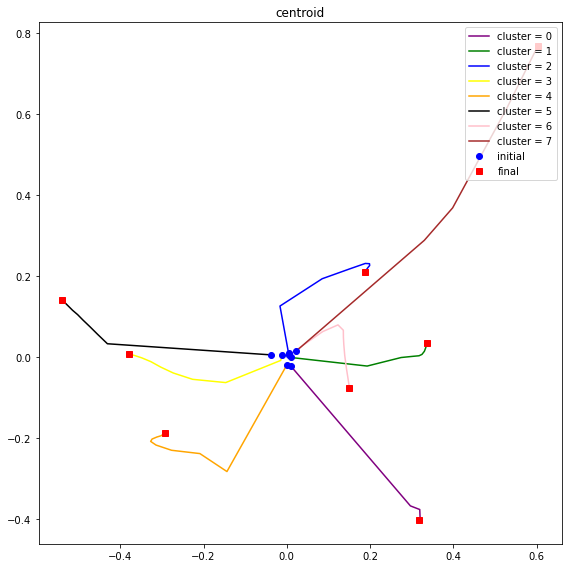

In [56]:
plt_centroid(centroid_iteration, number_cluster)

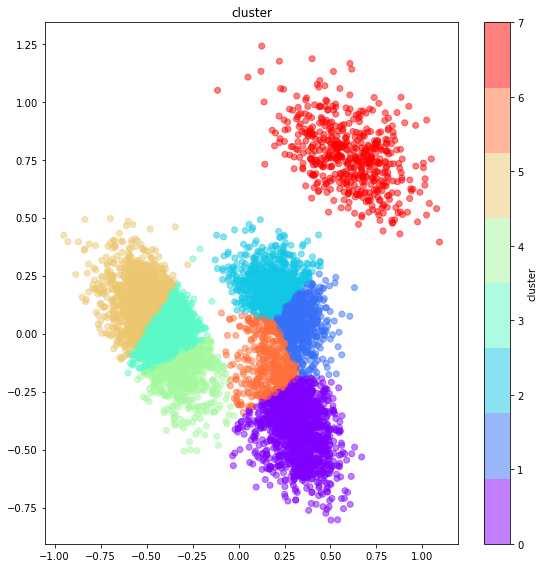

In [57]:
color_num = number_cluster
plt.figure(figsize=(8,8))  
plt.title('cluster')
plt.scatter(x, y, c = label_feature, cmap = plt.cm.get_cmap('rainbow', color_num), alpha = 0.5)
plt.colorbar(ticks = range(color_num), format = '%d', label = 'cluster')

plt.tight_layout()
plt.show()

In [58]:
# initiallize contingency table
contingency = np.zeros(shape=(len(df), len(df)))
contingency

contingency = get_contingency_table(contingency, label_feature)
contingency = pd.DataFrame(contingency)
contingency.head()

,0,1,2,3,4,5,6,7,8,9,...,6990,6991,6992,6993,6994,6995,6996,6997,6998,6999
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [59]:
contingency.to_csv("20171006-4.csv")